In [ ]:
import pandas as pd
import numpy as np

df_train = x`("train.csv")
df_test = pd.read_csv("test.csv")
df_sample = pd.read_csv("sample_submission.csv")

test_cp  = df_test.copy()
train_cp  = df_train.copy()

In [ ]:
train_cp['train']  = 1
test_cp['train']  = 0
df = pd.concat([train_cp, test_cp], axis=0,sort=False)
df_cp = df.copy()

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


### Checking for nan values in the daatset

In [ ]:

#Percentage of NAN Values 
nan_val_lst = [(clm, df[clm].isna().mean()*100) for clm in df]
df_nan = pd.DataFrame(nan_val_lst, columns=["Column_Name", "Percentage"])


df_nan.sort_values(by = "Percentage", ascending = False,inplace = True)
df_nan[df_nan["Percentage"]>20]

,Column_Name,Percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
80,SalePrice,49.982871
57,FireplaceQu,48.646797


In [ ]:
try:
    df = df.drop(["PoolQC","MiscFeature","Alley","Fence","SalePrice","FireplaceQu"],axis = 1)
except:
    df

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,train
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,1


### Dividing the dataset based on Columns having CATEGORICAL values and Columns having NUMERICAL values.

In [ ]:
df_cat = df.select_dtypes(include=['object']).copy()
df_num =df.select_dtypes(exclude=['object']).copy()

#### To deal with null values in Categorial columns

In [ ]:
cat_na_lst =  df_cat.isna().sum()
#print(cat_na_lst)
cat_na_lst.sort_values(ascending = False,inplace = True)
cat_na_lst = cat_na_lst[cat_na_lst>0]
print(cat_na_lst)

GarageCond      159
GarageQual      159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MSZoning          4
Utilities         2
Functional        2
Electrical        1
KitchenQual       1
SaleType          1
Exterior2nd       1
Exterior1st       1
dtype: int64


In [ ]:
na_colm_lst = ['GarageCond',"GarageQual","GarageFinish","GarageType","BsmtCond","BsmtExposure","BsmtQual","BsmtFinType2","BsmtFinType1"]
for colm in na_colm_lst:
    df_cat[colm].fillna(value = "None",inplace = True)
new_na_lst = df_cat.isna().sum()
print(new_na_lst[new_na_lst>0])

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
MasVnrType     24
Electrical      1
KitchenQual     1
Functional      2
SaleType        1
dtype: int64


#### Dealing with small number of na values by replacing na by their most frequent value

In [ ]:
na_lst = ['MSZoning','Utilities','Exterior1st','Exterior2nd','Electrical','KitchenQual',"MasVnrType",'Functional','SaleType']
for colm in na_lst:
    df_cat.loc[:,colm] = df_cat[colm].fillna(df_cat[colm].mode().iloc[0])
new_na_lst2 = df_cat.isna().sum()
new_na_lst2.sort_values(ascending = False, inplace = True)
print(new_na_lst2)

SaleCondition    0
Condition2       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
SaleType         0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
MSZoning         0
dtype: int64


### The categorial columns are cleaned now.

### To deal with null values in Numerical columns

In [ ]:
num_na_lst =  df_num.isna().sum()
#print(cat_na_lst)
num_na_lst.sort_values(ascending = False,inplace = True)
num_na_lst = num_na_lst[num_na_lst>0]
print(num_na_lst)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageCars        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageArea        1
dtype: int64


#### In LotFrontage and GarageYrBlt, replacing null values by median values.

In [ ]:
df_num["GarageYrBlt"].fillna(value = df_num["YrSold"]-((df_num['YrSold']-df_num['YearBuilt']).median()),inplace = True)
df_num["LotFrontage"].fillna(value = df_num["LotFrontage"].median(),inplace = True)

#df_num.loc[:,"GarageYrBlt"] = (df_num["GarageYrBlt"].fillna(df_num["YrSold"]-((df_num['YrSold']-df_num['YearBuilt']).median()))).copy()
#df_num.loc[:,"LotFrontage"] = (df_num["LotFrontage"].fillna(df_num["LotFrontage"].median())).copy()
na_lst1 = df_num.isna().sum()
print(na_lst1[na_lst1>0])

MasVnrArea      23
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
GarageCars       1
GarageArea       1
dtype: int64


In [ ]:
na_numcol_lst = ["MasVnrArea",'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
for colm in na_numcol_lst:
    df_num[colm].fillna(value = 0,inplace = True)
na_lst2 = df_num.isna().sum()
print(na_lst2[na_lst2>0])

Series([], dtype: int64)


#### The numerical columns have been cleaned.
### The Dataset is now cleaned. All the NAN values have been taken care of.

In [ ]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,train
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,1


### Removing unwanted columns of Categorical Values

#### Selection of Important Features from columns containing Categorical Values

[2269, 460, 139, 26, 25] ['RL' 'RM' 'C (all)' 'FV' 'RH']


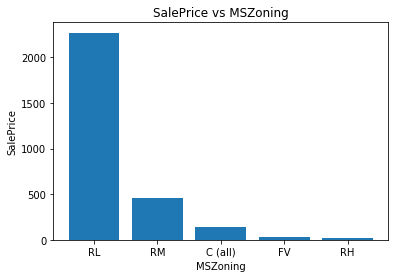

[2907, 12] ['Pave' 'Grvl']


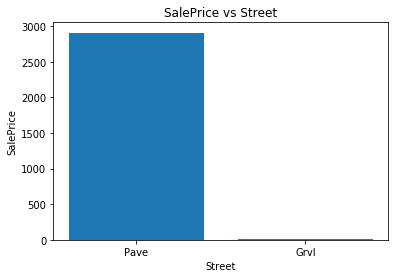

[1859, 968, 76, 16] ['Reg' 'IR1' 'IR2' 'IR3']


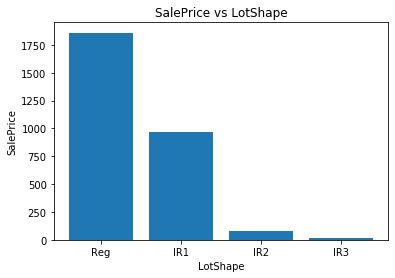

[2622, 120, 117, 60] ['Lvl' 'Bnk' 'Low' 'HLS']


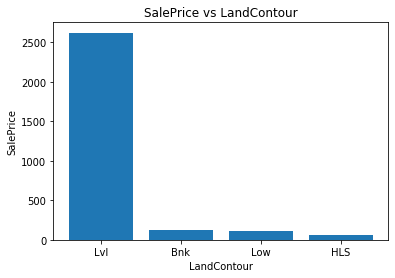

[2918, 1] ['AllPub' 'NoSeWa']


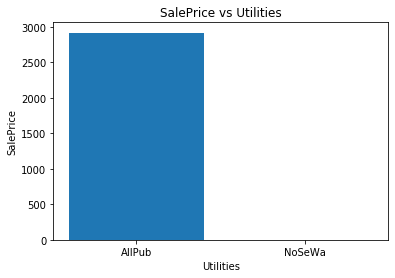

[2133, 511, 176, 85, 14] ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


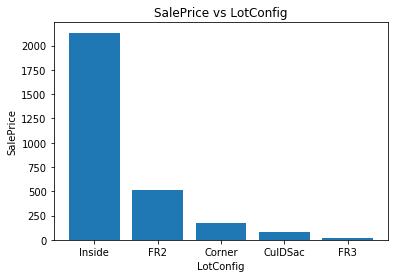

[2778, 125, 16] ['Gtl' 'Mod' 'Sev']


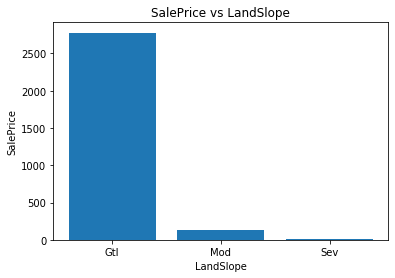

[443, 267, 239, 194, 182, 166, 165, 151, 131, 125, 114, 108, 103, 93, 72, 71, 51, 48, 44, 37, 30, 28, 24, 23, 10] ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


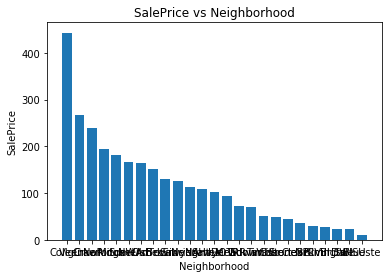

[2511, 164, 92, 50, 39, 28, 20, 9, 6] ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


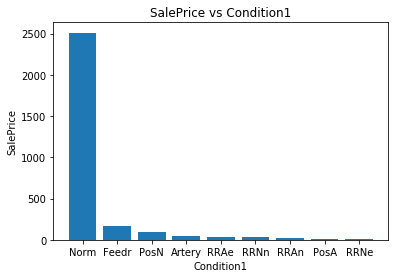

[2889, 13, 5, 4, 4, 2, 1, 1] ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


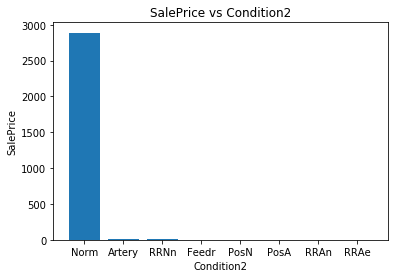

[2425, 227, 109, 96, 62] ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


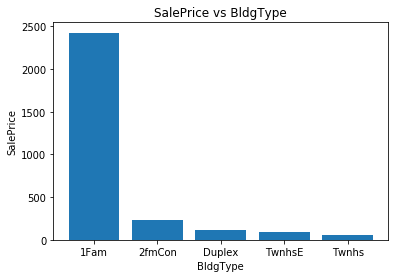

[1471, 872, 314, 128, 83, 24, 19, 8] ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


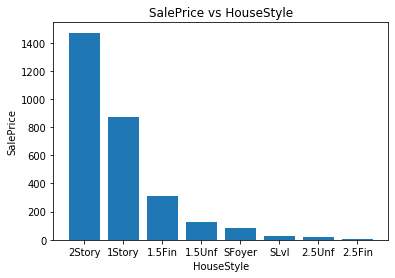

[2310, 551, 22, 20, 11, 5] ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


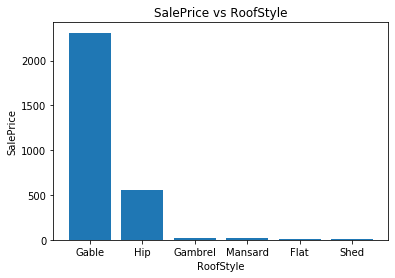

[2876, 23, 9, 7, 1, 1, 1, 1] ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


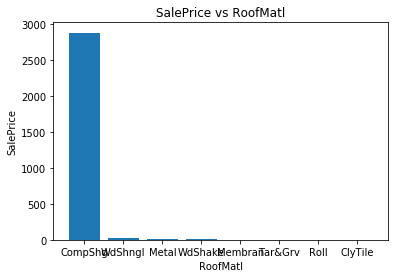

[1026, 450, 442, 411, 221, 126, 87, 56, 44, 43, 6, 2, 2, 2, 1] ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


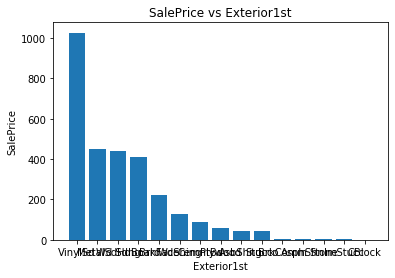

[1015, 447, 406, 391, 270, 126, 81, 47, 47, 38, 22, 15, 6, 4, 3, 1] ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


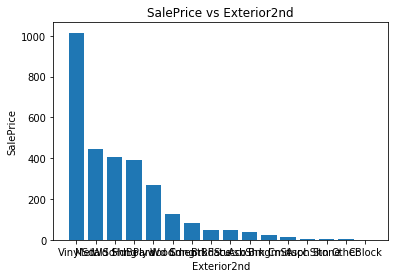

[1766, 879, 249, 25] ['BrkFace' 'None' 'Stone' 'BrkCmn']


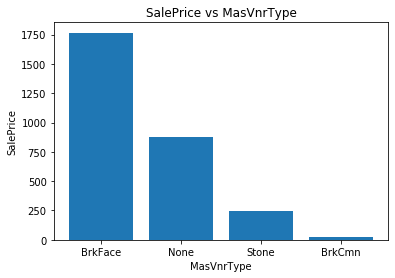

[1798, 979, 107, 35] ['Gd' 'TA' 'Ex' 'Fa']


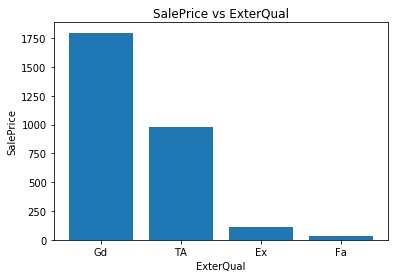

[2538, 299, 67, 12, 3] ['TA' 'Gd' 'Fa' 'Po' 'Ex']


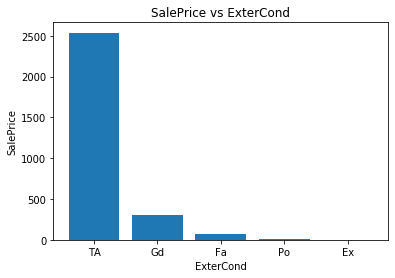

[1308, 1235, 311, 49, 11, 5] ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


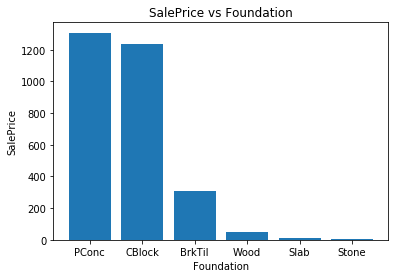

[1283, 1209, 258, 88, 81] ['Gd' 'TA' 'Ex' 'None' 'Fa']


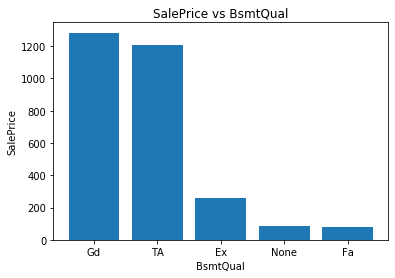

[2606, 122, 104, 82, 5] ['TA' 'Gd' 'None' 'Fa' 'Po']


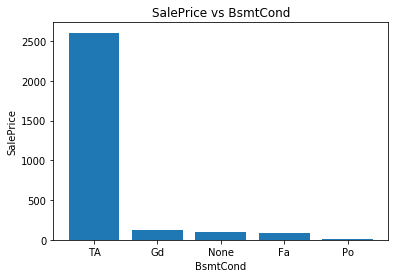

[1904, 418, 276, 239, 82] ['No' 'Gd' 'Mn' 'Av' 'None']


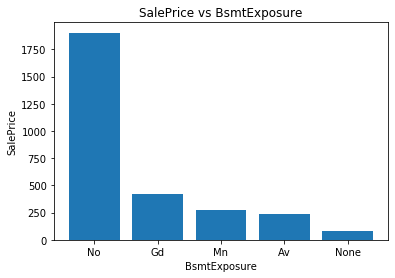

[851, 849, 429, 288, 269, 154, 79] ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']


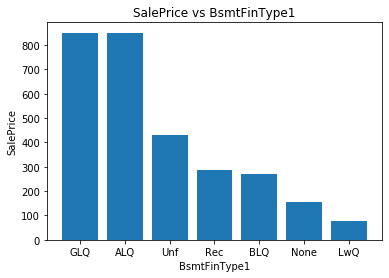

[2493, 105, 87, 80, 68, 52, 34] ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']


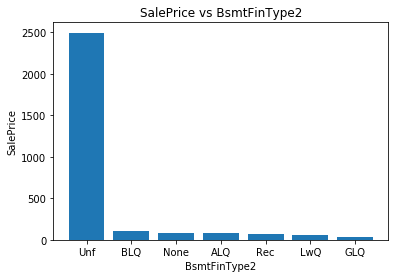

[2874, 27, 9, 6, 2, 1] ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


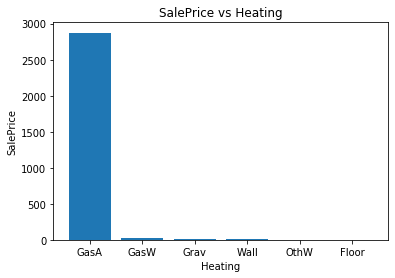

[1493, 857, 474, 92, 3] ['Ex' 'Gd' 'TA' 'Fa' 'Po']


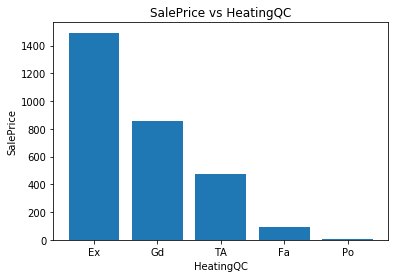

[2723, 196] ['Y' 'N']


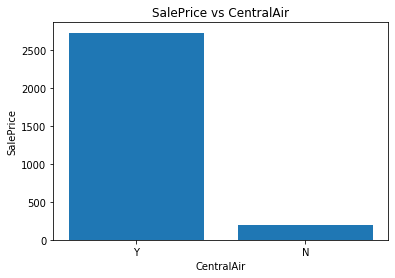

[2672, 188, 50, 8, 1] ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


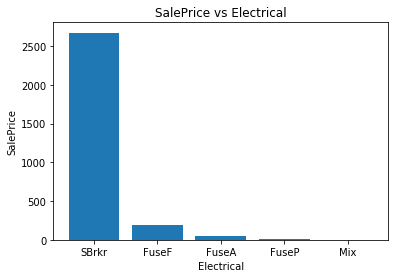

[1493, 1151, 205, 70] ['Gd' 'TA' 'Ex' 'Fa']


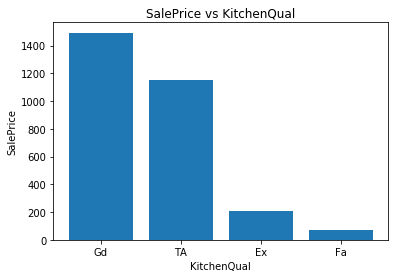

[2719, 70, 65, 35, 19, 9, 2] ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


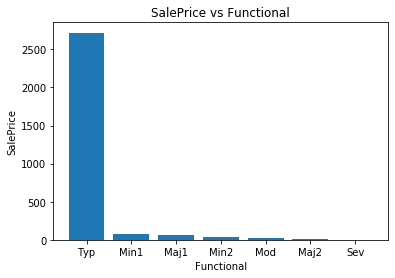

[1723, 779, 186, 157, 36, 23, 15] ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']


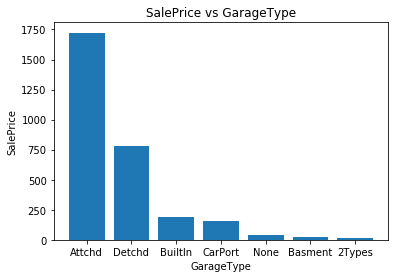

[1230, 811, 719, 159] ['RFn' 'Unf' 'Fin' 'None']


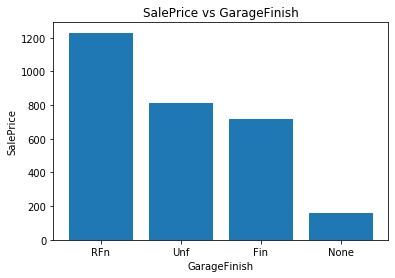

[2604, 159, 124, 24, 5, 3] ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']


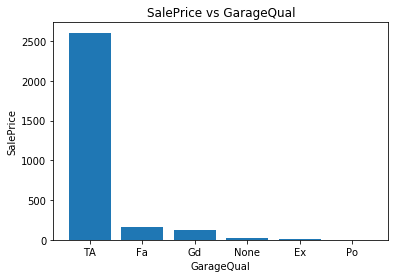

[2654, 159, 74, 15, 14, 3] ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']


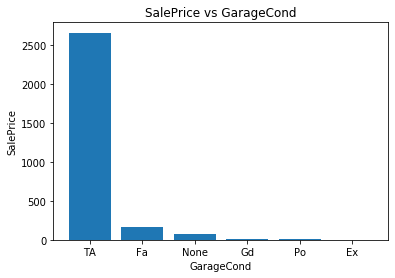

[2641, 216, 62] ['Y' 'N' 'P']


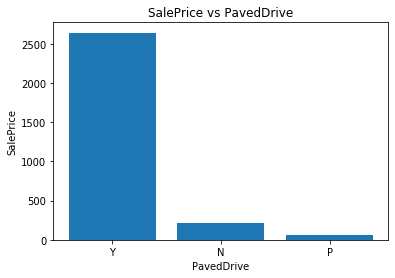

[2526, 239, 87, 26, 12, 9, 8, 7, 5] ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


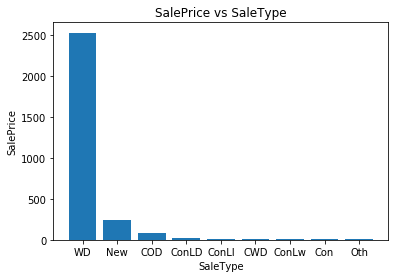

[2402, 245, 190, 46, 24, 12] ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


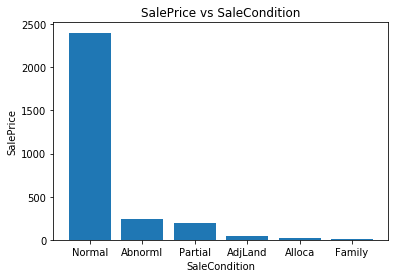

In [ ]:
import matplotlib.pyplot as plt

for colm in df_cat.columns:
    x_val = df_cat[colm].unique()
    y_val = df_cat[colm].value_counts()
    y_val = [element for element in y_val]
    print(y_val,x_val)
    plt.bar(x_val,y_val)
    plt.xlabel(colm)
    plt.ylabel("SalePrice")
    plt.title("SalePrice vs {}".format(colm))
    plt.show()

#### From above graphs, removing those columns which have almost no effect on SalePrice (those columns which have almost 99% percent data of one value)

In [ ]:
try:
    df_cat = df_cat.drop(["Heating","Street","Utilities","Condition2","RoofMatl","Condition1"], axis = 1)
except:
    df_cat

In [ ]:
df_cat.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,VinylSd,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,MetalSd,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,VinylSd,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,Wd Sdng,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,VinylSd,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


### All the cleaning and selection of important features of categorial columns is done.

### Using OneHotEncoder, LabelEncoder and ColumnTransformer to fit and transfrom this data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

scaler = MinMaxScaler()
le = LabelEncoder()
ct = ColumnTransformer([("",ohe(categories = "auto"),[0])], remainder = "passthrough")
for colm in df_cat.columns:
    df_cat[colm] = le.fit_transform(df_cat[colm])
    df_cat[colm] = scaler.fit_transform(df_cat[[colm]])
cat_val_arr = ct.fit_transform(df_cat)
df_cat_val = pd.DataFrame(cat_val_arr)
display(df_cat_val.head())

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.208333,...,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5,0.0,1.000000,...,1.0,1.000000,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.208333,...,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.250000,...,1.0,0.666667,1.0,0.833333,1.000000,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0.0,0.625000,...,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8


#### The Categoriacal Columns are ready for training purpose.
### Now, working on the Numerical Columns

In [ ]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,train
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,1


### Removing unwanted columns and replacing them with newly created columns.

In [ ]:
try:
    df_num.reset_index(inplace= True)
    df_num['TotalHouseSA'] = df_num['TotalBsmtSF'] + df_num['1stFlrSF'] + df_num['2ndFlrSF']
    df_num["GarageAge"] = df_num["YrSold"].copy() - df_num["GarageYrBlt"].copy()
    df_num["PropertyAge"] = df_num["YrSold"].copy() - df_num["YearBuilt"].copy()
    df_num['TotalBsmtBath'] = df_num['BsmtFullBath'] + df_num['BsmtHalfBath']*0.5
    df_num['TotalBath'] = df_num['FullBath'] + df_num['HalfBath']*0.5 
except:
    df_num

# Replaced columns like YearBuilt and YrSold, replacing them by relevant columns like PropertyAge since they were misleading

df_num.loc[df_num["PropertyAge"] <= 0, "PropertyAge"] = 0
df_num.loc[df_num['GarageAge'] < 0, "GarageAge"] = 0
pd.set_option('display.max_columns', 38)
#pd.set_option('display.max_rows', 2919)
display(df_num.head())

#Some of the values of PropertyAge and GarageAge were less than zero.Removing such errors in data.

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,train,TotalHouseSA,GarageAge,PropertyAge,TotalBsmtBath,TotalBath
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,...,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,1,2566.0,5.0,5,1.0,2.5
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,...,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,1,2524.0,31.0,31,0.5,2.0
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,...,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,1,2706.0,7.0,7,1.0,2.5
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,...,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,1,2473.0,8.0,91,1.0,1.0
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,...,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,1,3343.0,8.0,8,1.0,2.5


#### Removing those columns which are not required

In [ ]:
try:
    df_num = df_num.drop(["YearBuilt","YrSold","YearRemodAdd","GarageYrBlt","TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis = 1)
    df_num = df_num.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis = 1)

except:
    df_num

In [ ]:

try:
    index = df_num["index"].copy()
    df_num.set_index("index",inplace = True)
except:
    df_num
try:
    df_num.drop(["Id"],axis = 1,inplace = True)
    df_num.drop(["level0"],axis = 1,inplace = True)
except:
    df_num
display(df_num)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,train,TotalHouseSA,GarageAge,PropertyAge,TotalBsmtBath,TotalBath
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60,65.0,8450,7,5,196.0,706.0,0.0,150.0,0,1710,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,1,2566.0,5.0,5,1.0,2.5
1,20,80.0,9600,6,8,0.0,978.0,0.0,284.0,0,1262,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,1,2524.0,31.0,31,0.5,2.0
2,60,68.0,11250,7,5,162.0,486.0,0.0,434.0,0,1786,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,1,2706.0,7.0,7,1.0,2.5
3,70,60.0,9550,7,5,0.0,216.0,0.0,540.0,0,1717,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,1,2473.0,8.0,91,1.0,1.0
4,60,84.0,14260,8,5,350.0,655.0,0.0,490.0,0,2198,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,1,3343.0,8.0,8,1.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,0.0,0.0,0.0,546.0,0,1092,3,1,5,0,0.0,0.0,0,0,0,0,0,0,0,6,0,1638.0,35.0,36,0.0,1.5
1455,160,21.0,1894,4,5,0.0,252.0,0.0,294.0,0,1092,3,1,6,0,1.0,286.0,0,24,0,0,0,0,0,4,0,1638.0,36.0,36,0.0,1.5
1456,20,160.0,20000,5,7,0.0,1224.0,0.0,0.0,0,1224,4,1,7,1,2.0,576.0,474,0,0,0,0,0,0,9,0,2448.0,46.0,46,1.0,1.0


In [ ]:


try:
    df_cat_val["index"] = index
    df_cat_val.set_index("index",inplace = True)
except:
    df_cat_val
display(df_cat_val.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.208333,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,1.0,0.0,1.0,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5,0.0,1.000000,0.0,0.285714,0.2,0.571429,0.533333,0.666667,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,1.0,0.0,1.0,1.0,1.000000,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.208333,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.50,0.333333,1.0,0.0,1.0,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.0,0.714286,0.2,0.928571,1.000000,0.666667,1.000000,1.0,0.0,1.0,0.25,0.75,0.000000,1.0,0.5,1.0,1.0,0.666667,1.0,0.833333,1.000000,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0.0,0.625000,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,1.0,0.0,1.0,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8


### The Preprocessing on the data is completed

**Now, combining Categorical Coloumns and Numerical Columns into one Dataframe**

In [ ]:
df_final = pd.concat([df_cat_val,df_num],axis = 1,sort = False)


In [ ]:
pd.set_option("display.max_columns",67)
df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,train,TotalHouseSA,GarageAge,PropertyAge,TotalBsmtBath,TotalBath
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.208333,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,1.0,0.0,1.0,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,60,65.0,8450,7,5,196.0,706.0,0.0,150.0,0,1710,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,1,2566.0,5.0,5,1.0,2.5
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5,0.0,1.000000,0.0,0.285714,0.2,0.571429,0.533333,0.666667,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,1.0,0.0,1.0,1.0,1.000000,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,20,80.0,9600,6,8,0.0,978.0,0.0,284.0,0,1262,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,1,2524.0,31.0,31,0.5,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.208333,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.50,0.333333,1.0,0.0,1.0,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,60,68.0,11250,7,5,162.0,486.0,0.0,434.0,0,1786,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,1,2706.0,7.0,7,1.0,2.5
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.0,0.714286,0.2,0.928571,1.000000,0.666667,1.000000,1.0,0.0,1.0,0.25,0.75,0.000000,1.0,0.5,1.0,1.0,0.666667,1.0,0.833333,1.000000,1.0,1.0,1.0,1.0,0.0,70,60.0,9550,7,5,0.0,216.0,0.0,540.0,0,1717,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,1,2473.0,8.0,91,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0.0,0.625000,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,1.0,0.0,1.0,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,60,84.0,14260,8,5,350.0,655.0,0.0,490.0,0,2198,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,1,3343.0,8.0,8,1.0,2.5


#### Splitting the dataset into Train and Test Dataset

In [ ]:
train_df = (df_final[df_final["train"] == 1]).copy()
try:
    train_df.drop('train',axis = 1,inplace = True)
except:
    train_df
pd.set_option("display.max_columns",66)
display(train_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,TotalHouseSA,GarageAge,PropertyAge,TotalBsmtBath,TotalBath
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.208333,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,1.000000,0.0,1.0,1.0,0.666667,1.000000,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,60,65.0,8450,7,5,196.0,706.0,0.0,150.0,0,1710,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2566.0,5.0,5,1.0,2.5
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5,0.0,1.000000,0.0,0.285714,0.2,0.571429,0.533333,0.666667,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,1.000000,0.0,1.0,1.0,1.000000,1.000000,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,20,80.0,9600,6,8,0.0,978.0,0.0,284.0,0,1262,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2524.0,31.0,31,0.5,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.208333,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.50,0.333333,1.000000,0.0,1.0,1.0,0.666667,1.000000,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,60,68.0,11250,7,5,162.0,486.0,0.0,434.0,0,1786,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2706.0,7.0,7,1.0,2.5
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.0,0.714286,0.2,0.928571,1.000000,0.666667,1.000000,1.0,0.0,1.0,0.25,0.75,0.000000,1.000000,0.5,1.0,1.0,0.666667,1.000000,0.833333,1.000000,1.0,1.0,1.0,1.0,0.0,70,60.0,9550,7,5,0.0,216.0,0.0,540.0,0,1717,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2473.0,8.0,91,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0.0,0.625000,0.0,0.714286,0.2,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,1.000000,0.0,1.0,1.0,0.666667,1.000000,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,60,84.0,14260,8,5,350.0,655.0,0.0,490.0,0,2198,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,3343.0,8.0,8,1.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.333333,0.0,0.714286,0.2,0.857143,0.866667,0.666667,1.000000,1.0,0.4,0.5,1.00,0.75,1.000000,1.000000,0.0,1.0,1.0,1.000000,1.000000,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,60,62.0,7917,6,5,0.0,0.0,0.0,953.0,0,1647,3,1,7,1,2.0,460.0,0,40,0,0,0,0,0,8,2600.0,8.0,8,0.0,2.5
1456,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.583333,0.0,0.285714,0.2,0.642857,0.666667,1.000000,1.000000,1.0,0.2,0.5,1.00,0.75,0.000000,0.833333,1.0,1.0,1.0,1.000000,0.333333,0.166667,1.000000,1.0,1.0,1.0,1.0,0.8,20,85.0,13175,6,6,119.0,790.0,163.0,589.0,0,2073,3,1,7,2,2.0,500.0,349,0,0,0,0,0,0,2,3615.0,32.0,32,1.0,2.0
1457,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.250000,0.0,0.714286,0.2,0.357143,0.333333,0.666667,0.000000,0.5,0.8,1.0,0.25,0.75,0.333333,1.000000,0.0,1.0,1.0,0.666667,1.000000,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,70,66.0,9042,7,9,0.0,275.0,0.0,877.0,0,2340,4,1,9,2,1.0,252.0,0,60,0,0,0,0,2500,5,3492.0,69.0,69,0.0,2.0


In [ ]:
test_df = df_final[df_final["train"] == 0].copy()
try:
    test_df.drop("train",axis = 1, inplace = True)
except:
    test_df
pd.set_option("display.max_columns",66)
display(test_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,TotalHouseSA,GarageAge,PropertyAge,TotalBsmtBath,TotalBath
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.500000,0.00,0.285714,0.2,0.857143,0.866667,0.666667,1.000000,1.0,0.2,1.0,1.0,0.75,0.833333,0.5,1.0,1.0,1.0,1.000000,1.0,0.166667,1.000000,1.0,1.0,1.0,1.0,0.8,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,0,896,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,1778.0,49.0,49,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.500000,0.00,0.285714,0.6,0.928571,0.933333,0.333333,1.000000,1.0,0.2,1.0,1.0,0.75,0.000000,1.0,1.0,1.0,1.0,0.666667,1.0,0.166667,1.000000,1.0,1.0,1.0,1.0,0.8,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,0,1329,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2658.0,52.0,52,0.0,1.5
2,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.0,0.333333,0.00,0.714286,0.2,0.857143,0.866667,0.666667,1.000000,1.0,0.4,0.5,1.0,0.75,0.333333,1.0,0.5,1.0,1.0,1.000000,1.0,0.166667,0.000000,1.0,1.0,1.0,1.0,0.8,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,0,1629,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2557.0,13.0,13,0.0,2.5
3,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.0,0.333333,0.00,0.714286,0.2,0.857143,0.866667,0.333333,1.000000,1.0,0.4,1.0,1.0,0.75,0.333333,1.0,0.0,1.0,1.0,0.666667,1.0,0.166667,0.000000,1.0,1.0,1.0,1.0,0.8,60,78.0,9978,6,6,20.0,602.0,0.0,324.0,0,1604,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,6,2530.0,12.0,12,0.0,2.5
4,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,1.0,0.0,0.916667,1.00,0.285714,0.2,0.428571,0.400000,0.666667,0.666667,1.0,0.4,0.5,1.0,0.75,0.000000,1.0,0.0,1.0,1.0,0.666667,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.8,120,43.0,5005,8,5,0.0,263.0,0.0,1017.0,0,1280,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,1,2560.0,18.0,18,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.416667,0.75,0.714286,0.2,0.357143,0.333333,0.666667,1.000000,1.0,0.2,1.0,1.0,0.75,1.000000,1.0,0.5,1.0,1.0,1.000000,1.0,1.000000,0.333333,0.6,0.6,1.0,1.0,0.8,160,21.0,1936,4,7,0.0,0.0,0.0,546.0,0,1092,3,1,5,0,0.0,0.0,0,0,0,0,0,0,0,6,1638.0,35.0,36,0.0,1.5
1455,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.416667,1.00,0.714286,0.2,0.357143,0.333333,0.666667,1.000000,1.0,0.2,1.0,1.0,0.75,0.833333,1.0,1.0,1.0,1.0,1.000000,1.0,0.666667,1.000000,1.0,1.0,1.0,1.0,0.0,160,21.0,1894,4,5,0.0,252.0,0.0,294.0,0,1092,3,1,6,0,1.0,286.0,0,24,0,0,0,0,0,4,1638.0,36.0,36,0.0,1.5
1456,0.0,0.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.458333,0.00,0.285714,0.2,0.857143,0.866667,0.666667,1.000000,1.0,0.2,1.0,1.0,0.75,0.000000,1.0,0.0,1.0,1.0,1.000000,1.0,0.833333,1.000000,1.0,1.0,1.0,1.0,0.0,20,160.0,20000,5,7,0.0,1224.0,0.0,0.0,0,1224,4,1,7,1,2.0,576.0,474,0,0,0,0,0,0,9,2448.0,46.0,46,1.0,1.0


#### Dividing the Features and the Target variable of Train Dataset

In [ ]:
x_val = train_df.copy()
y_val = df_train["SalePrice"]

#### The Data is Ready for use in Modelling.

### Model Selection

In [ ]:
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

result = pd.DataFrame(columns = ["params","split0_test_score","split1_test_score","split2_test_score","split3_test_score","mean_test_score"])

models_lst  =[(LinearRegression(),{}),
              (DecisionTreeRegressor(random_state = 7),{"criterion":["mse"],
                                                                     "max_features":["auto","sqrt"]})]
for model in models_lst:
    clf = GridSearchCV(model[0],model[1],cv = 4,return_train_score = False)
    clf.fit(x_val,y_val)
    df_res = pd.DataFrame(clf.cv_results_)
    result = pd.concat([result,df_res.loc[:,["params","split0_test_score","split1_test_score","split2_test_score","split3_test_score","mean_test_score"]]],
                       axis = 0, sort = False)
print()


result["Model"] = ["Linear Regression","DecisionTreeRegressor","DecisionTreeRegressor"]
df_result = result.set_index("Model")
df_result

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score
Model,,,,,,
Linear Regression,{},0.881922,0.825317,0.841826,0.696404,0.811367
DecisionTreeRegressor,"{'criterion': 'mse', 'max_features': 'auto'}",0.627858,0.696832,0.726301,0.694254,0.686311
DecisionTreeRegressor,"{'criterion': 'mse', 'max_features': 'sqrt'}",0.638628,0.717248,0.640298,0.654107,0.662571


###  From above analysis, the Best model for prediction of data is **Linear Regression**.

In [ ]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_val,y_val)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Depolying the Model

In [ ]:
import joblib

#Creating a new model
joblib.dump(model_lr,"House_Prediction_Model")

['House_Prediction_Model']

### To predict the house prices of test data,

In [ ]:
df_prediction = pd.DataFrame(columns = ["Id"])
df_prediction["Id"] = df_test["Id"]
df_prediction

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


## Implementation of model

In [ ]:
import joblib

hp_model = joblib.load("House_Prediction_Model")

predicted_home_prices = hp_model.predict(test_df)

df_prediction["SalePrice"] = predicted_home_prices
display(df_prediction)

,Id,SalePrice
0,1461,105916.769045
1,1462,144435.474347
2,1463,169567.293246
3,1464,184104.722743
4,1465,191407.630307
...,...,...
1454,2915,65915.248660
1455,2916,53205.859861
1456,2917,145642.639782
1457,2918,123184.694635


## Thus We have successfully implemented the model for prediction of House Prices of the Test Dataset.